In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter

# Set plot style
plt.style.use("default")

In [3]:
data = pd.read_csv("../data/Britannia.csv")

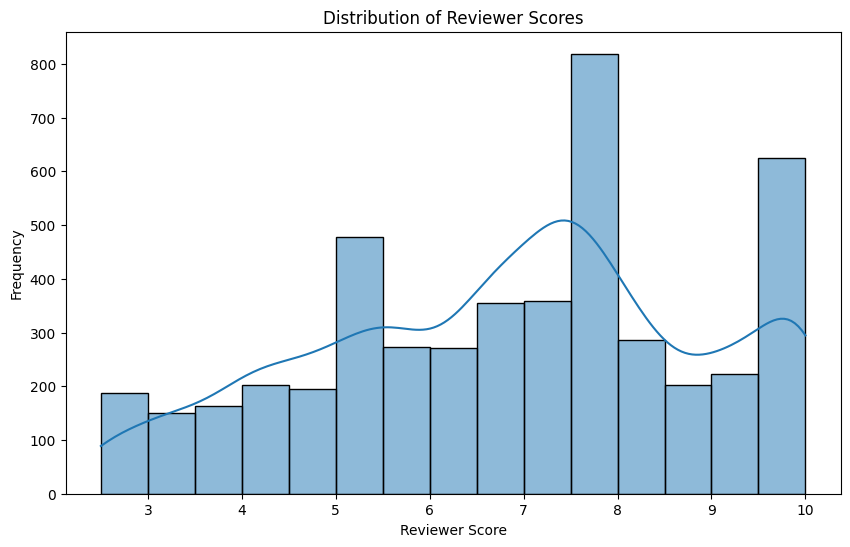

In [25]:
# 1. Distribution of Reviewer Scores

plt.figure(figsize=(10, 6))
sns.histplot(data["Reviewer_Score"], bins=15, kde=True)
plt.title("Distribution of Reviewer Scores")
plt.xlabel("Reviewer Score")
plt.ylabel("Frequency")

# Set x-axis ticks to show all values within the score range
# plt.xticks(
#     range(int(data["Reviewer_Score"].min()), int(data["Reviewer_Score"].max()) + 1)
# )

plt.show()

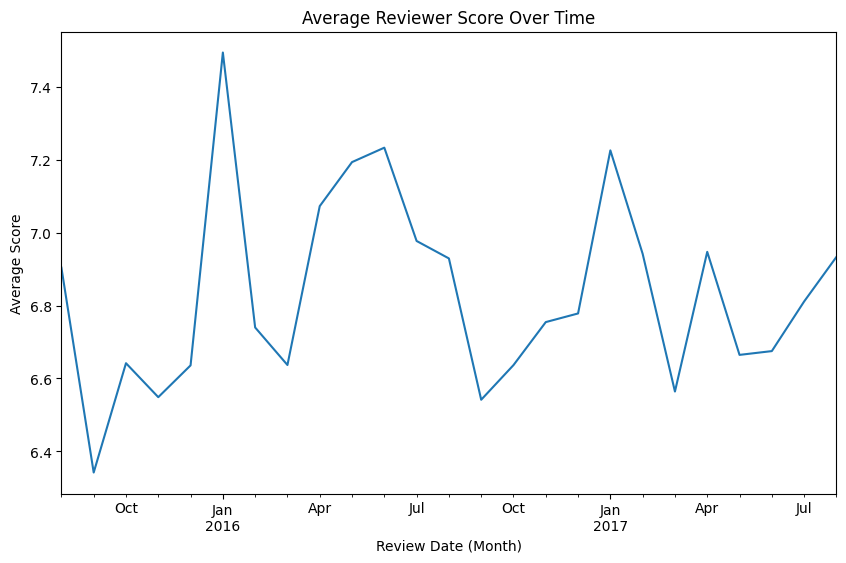

In [ ]:
# 2. Average Reviewer Score Over Time

data["Review_Date"] = pd.to_datetime(data["Review_Date"], errors="coerce")
data["Review_Month"] = data["Review_Date"].dt.to_period("M")
monthly_avg_score = data.groupby("Review_Month")["Reviewer_Score"].mean()

plt.figure(figsize=(10, 6))
monthly_avg_score.plot(kind="line")
plt.title("Average Reviewer Score Over Time")
plt.xlabel("Review Date (Month)")
plt.ylabel("Average Score")
plt.show()

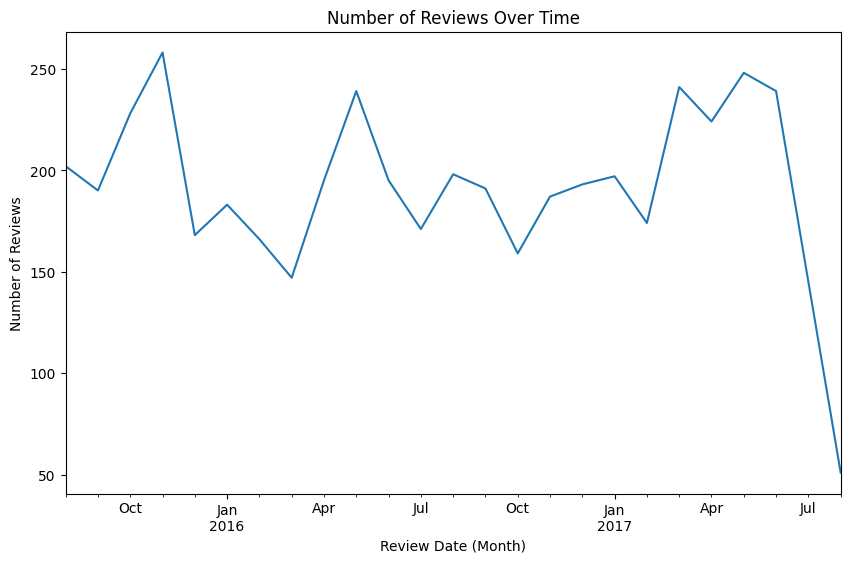

In [13]:
# 3. Review Count Over Time (by month)

monthly_reviews = data.groupby("Review_Month").size()

plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind="line")
plt.title("Number of Reviews Over Time")
plt.xlabel("Review Date (Month)")
plt.ylabel("Number of Reviews")
plt.show()

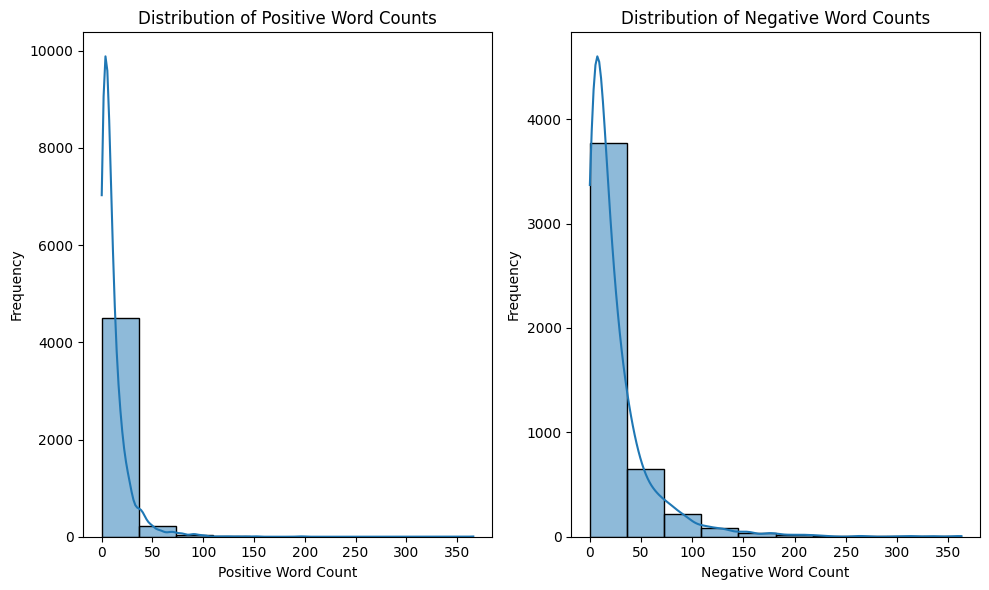

In [11]:
# 4. Positive and Negative Word Counts Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Positive Word Counts
sns.histplot(data["Review_Total_Positive_Word_Counts"], bins=10, kde=True, ax=ax1)
ax1.set_title("Distribution of Positive Word Counts")
ax1.set_xlabel("Positive Word Count")
ax1.set_ylabel("Frequency")

# Negative Word Counts
sns.histplot(data["Review_Total_Negative_Word_Counts"], bins=10, kde=True, ax=ax2)
ax2.set_title("Distribution of Negative Word Counts")
ax2.set_xlabel("Negative Word Count")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

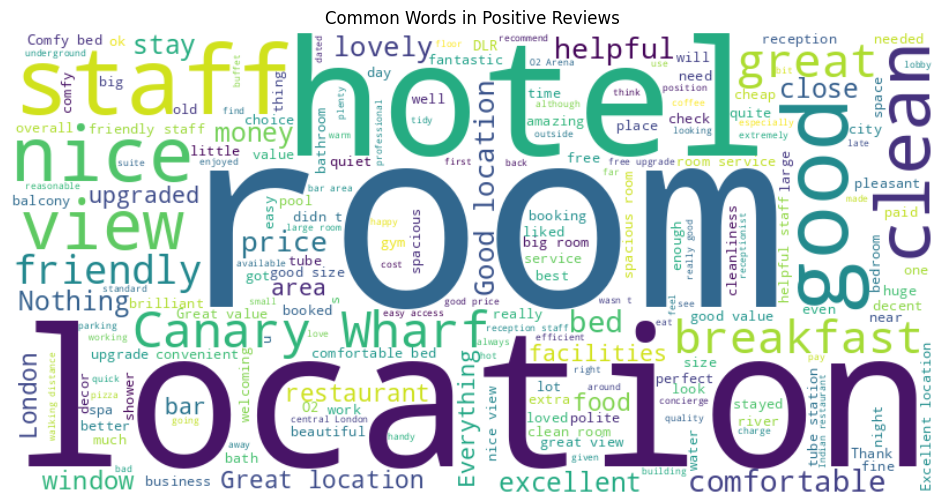

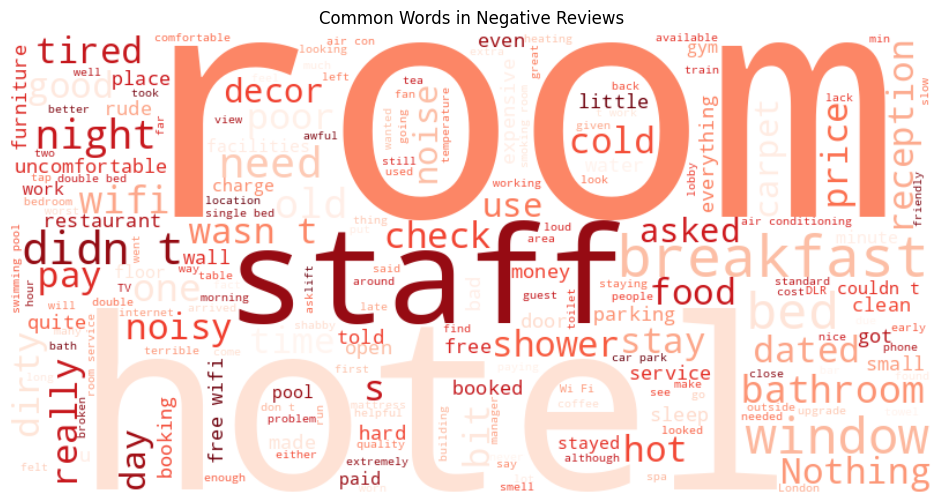

In [14]:
# 5. Frequent Positive and Negative Words
# Join all positive and negative reviews into single strings for word cloud analysis
positive_reviews = " ".join(
    data[data["Positive_Review"] != "No Positive"]["Positive_Review"]
)
negative_reviews = " ".join(
    data[data["Negative_Review"] != "No Negative"]["Negative_Review"]
)

# Word cloud for Positive Reviews
plt.figure(figsize=(12, 6))
wordcloud_positive = WordCloud(
    width=800, height=400, background_color="white"
).generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Positive Reviews")
plt.show()

# Word cloud for Negative Reviews
plt.figure(figsize=(12, 6))
wordcloud_negative = WordCloud(
    width=800, height=400, background_color="white", colormap="Reds"
).generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Negative Reviews")
plt.show()

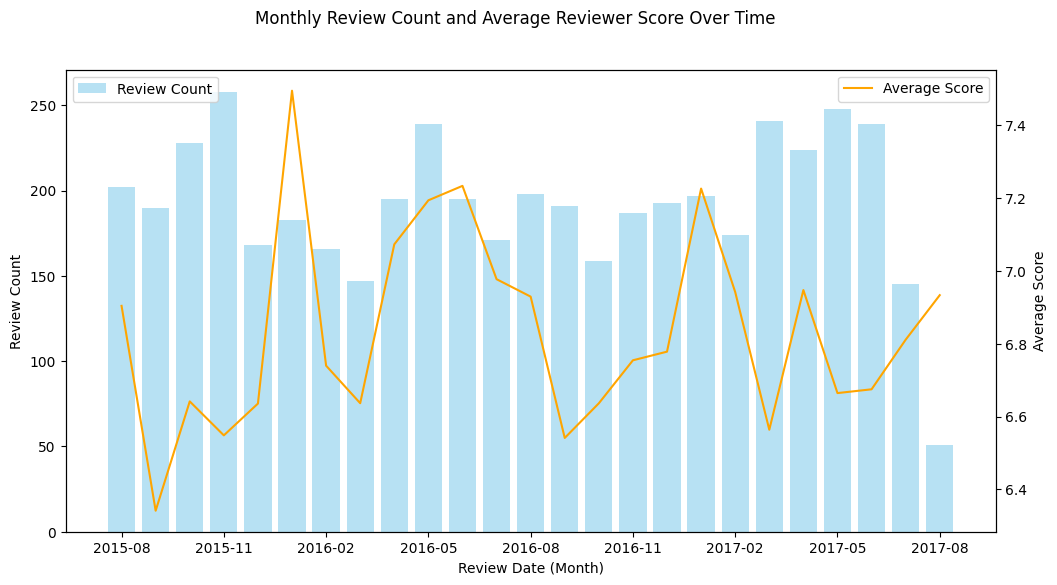

In [18]:
# 6. Reviewer Nationality Distribution
# Selecting the top 10 nationalities for better readability in visualization
# 1. Combined Single Plot for Average Score and Monthly Review Count

fig, ax1 = plt.subplots(figsize=(12, 6))

# Monthly review count as bars (left axis)
ax1.bar(
    monthly_reviews.index.astype(str),
    monthly_reviews.values,
    color="skyblue",
    alpha=0.6,
    label="Review Count",
)
ax1.set_xlabel("Review Date (Month)")
ax1.set_ylabel("Review Count")
ax1.tick_params(axis="y")
ax1.set_xticks(
    monthly_reviews.index[::3].astype(str)
)  # Show every 3rd month for readability

# Average score as a line plot (right axis)
ax2 = ax1.twinx()
ax2.plot(
    monthly_avg_score.index.astype(str),
    monthly_avg_score.values,
    color="orange",
    label="Average Score",
)
ax2.set_ylabel("Average Score")
ax2.tick_params(axis="y")

# Title and Legends
fig.suptitle("Monthly Review Count and Average Reviewer Score Over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

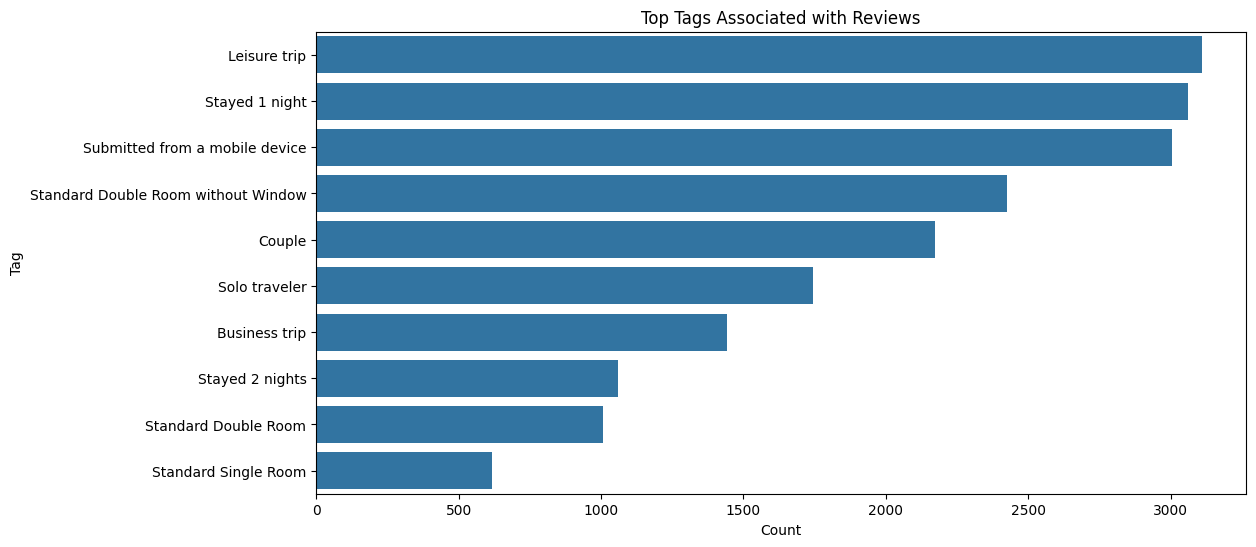

In [17]:
# 8. Tags Analysis
# Extract all tags from the Tags column
tags = data["Tags"].dropna().apply(lambda x: ast.literal_eval(x))
all_tags = [tag.strip() for sublist in tags for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags).most_common(10)

# Convert to DataFrame for plotting
tag_df = pd.DataFrame(tag_counts, columns=["Tag", "Count"])

# Plotting top tags
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Tag", data=tag_df)
plt.title("Top Tags Associated with Reviews")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()